# Прогноз продаж в интернет-магазине

Нам доступны исторические данные о продажах игр интернет-магазина «Стримчик», оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно  определть потенциально популярный продукт и спланировать рекламные кампании. Для  этого нужно выявить определяющие успешность игры закономерности.

## Общая информация

In [399]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [400]:
# Чтение файла с данными
games = pd.read_csv('datasets/games.csv')

In [401]:
# Выводим первые 10 строк
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В первых строках уже есть пропуски

In [402]:
# Общая информация
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Столбец User_Score должен быть преобразован в float
* Наименования столюцов приведем к нижнему регистру

In [403]:
# Кол-во пропусков
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [404]:
# Метод для вывода процента пропусков
def percentageOfOmissions(data):
    lenColumns = len(data.columns)
    lenght = len(data)
    passes = sum(data.isna().sum())

    return round(passes*100/(lenColumns*lenght),2)
    
print(f'Среднее значение количества пропусков в столбце: {percentageOfOmissions(games)}%')

Среднее значение количества пропусков в столбце: 12.14%


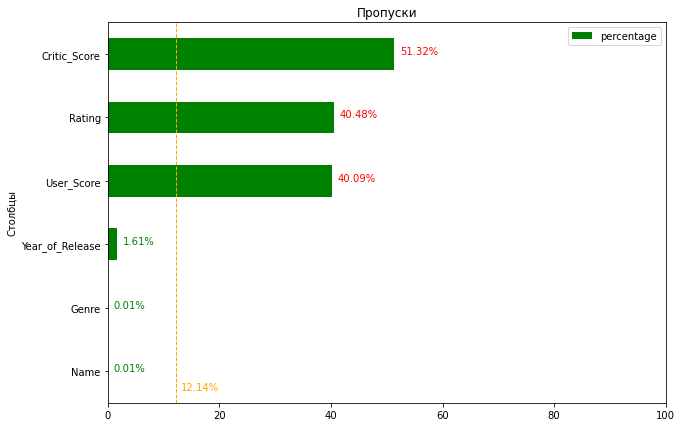

In [405]:
# Визуализация пропусков

def gapVisualization(df):
    data = { "name" : [], "passes":[] }
    index = 0

    for item in df.isna().sum():
        if item > 0:
            data["name"].append(df.columns[index])
            data["passes"].append(item)
        index += 1

    passes = pd.DataFrame(data=data)
    passes["percentage"]  = round(passes["passes"]*100/len(df), 2)
    passes = passes.sort_values(by="percentage")
    plot =passes.plot( color='green', y="percentage", x="name", kind="barh", xlim=(0,100), figsize=(10, 7), title="Пропуски", xlabel="Столбцы")

    index = 0
    for k in passes["percentage"]:
        color = 'green'
        if k > 10:
            color='orange'
        if k > 30:
            color='red'
        plot.text(k + 1, index, f'{k}%', color=color)
        index += 1


    percent = percentageOfOmissions(df)
    plt.axvline(x=percent,linewidth=1, color='orange', linestyle='--')
    plot.text(percent + 1, -0.3, f'{percent}%', color='orange')

gapVisualization(games)   

`Critic_Score, User_Scope` 
* Крупнейшие платформы, освещающие рынок игр, стали появляться во второй половине 90-х (IGN - 1996, Igromania - 1997, Metacritic - 1998). Таким образом, вполне вероятно, что далеко не всем играм, выпущенным до 1996 года, критики ставили оценки. Ведь оценки играм пользователям нужно было где-то размещать в сети. Также, так как данные не за полный 2016 год, то и там логично наблюдать пустые значения. Пропуски заменим на -1, чтобы не перемещать их с значениями 0

`Rating` 
* Крупнейшая негосударственная организация (ESRB), присуждающая рейтинги играм была основана в 1994 году. Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг. Пропуски заменим на No ESRB

`Year_of_Release`
* Имеет 1,6% пропусков. Средними или медианами эти пропуски не заполнить, эти данные не самымые важные для анализа данных, да и пропусков в столбце не так много. Поэтому оставляем как есть.

In [406]:
# Вывод платформ
games["Platform"].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [407]:
# Вывод жанр
games["Genre"].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [408]:
# Вывод категорий рейтинга
games["Rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [409]:
# Проверка на наличие дубликатов
games.duplicated().sum()

0

Дубликатов не имеется.

## Подготовка данных

### Приведение столбцов к нижнему регистру 

In [410]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов

Надо выяснить почему у user_score тип object

In [411]:
# Праверка значений 
games["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' - "To Be Determined" недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации. Можно на менить на -1

In [412]:
# Заменяем tbd на -1
games.loc[games["user_score"] == 'tbd', "user_score"]  = -1\
# Меняем тип на float
games["user_score"] = games["user_score"].astype(float)

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Тепер все типы в норме

### Обработка пропусков

#### critic_score

In [413]:
# Обработка пропусков в critic_score
games.loc[games["critic_score"].isna(), "critic_score"] = -1

#### user_score       

In [414]:
# Обработка пропусков в user_score
games.loc[games["user_score"].isna(), "user_score"] = -1

#### user_score

In [415]:
# Обработка пропусков в user_score
games.loc[games["rating"].isna(), "rating"] = 'NoESRB'

#### name

In [416]:
games[games["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,NoESRB
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,NoESRB


Данных практически нет. Можно удалить

In [417]:
games = games[~games["name"].isna()]

#### year_of_release
Можно попробовать найти года на других платформах

In [418]:
for i in games.loc[games["year_of_release"].isna()].index :
    year = games.loc[games["name"] == games["name"][i], "year_of_release"].max()
    if year > 0 :
        games["year_of_release"][i] = year

C:\Users\Ali\AppData\Local\Temp/ipykernel_16388/152764341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["year_of_release"][i] = year


In [419]:
# Кол-во пропусков
games.isna().sum()

name                 0
platform             0
year_of_release    146
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

### Добавление столбца суммарные продажи во всех регионах

In [420]:
# Добавление столбца суммарные продажи во всех регионах
games["sales_total"] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [421]:
# Вывод первых 10 строк
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NoESRB,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NoESRB,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NoESRB,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NoESRB,28.31


## Исследовательский анализ

###  Cколько игр выпускалось в разные годы

<AxesSubplot:title={'center':'Количество игр по годам'}, xlabel='year_of_release'>

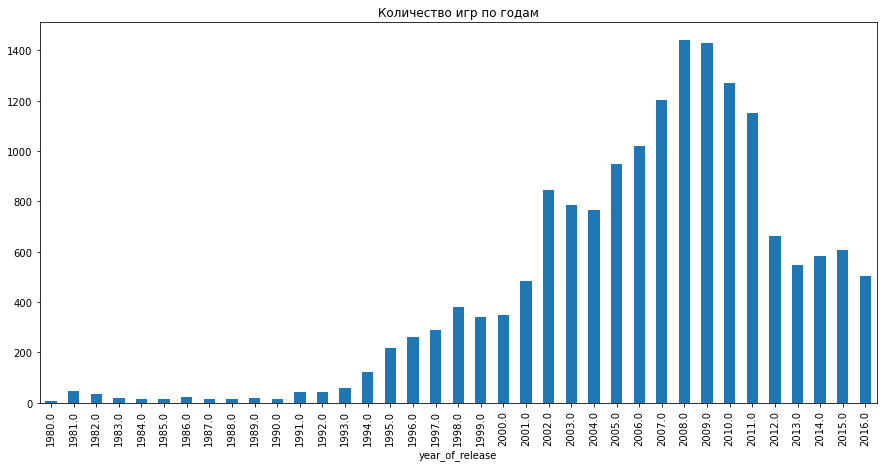

In [422]:
# Количество игр по годам
games.groupby(by=["year_of_release"])["name"].count().plot(kind="bar", figsize=(15, 7), title="Количество игр по годам")

На графике видно, что до появления 22-го марта 1993 года Pentium 1, игр было очень мало. С 1994 по 2009 маштабы увеличивались, потом с появлением социальных сетей и мобильных устройств начался на спад.

## 

### Как менялись продажи по платформам

<AxesSubplot:title={'center':'Количество игр по платформам'}>

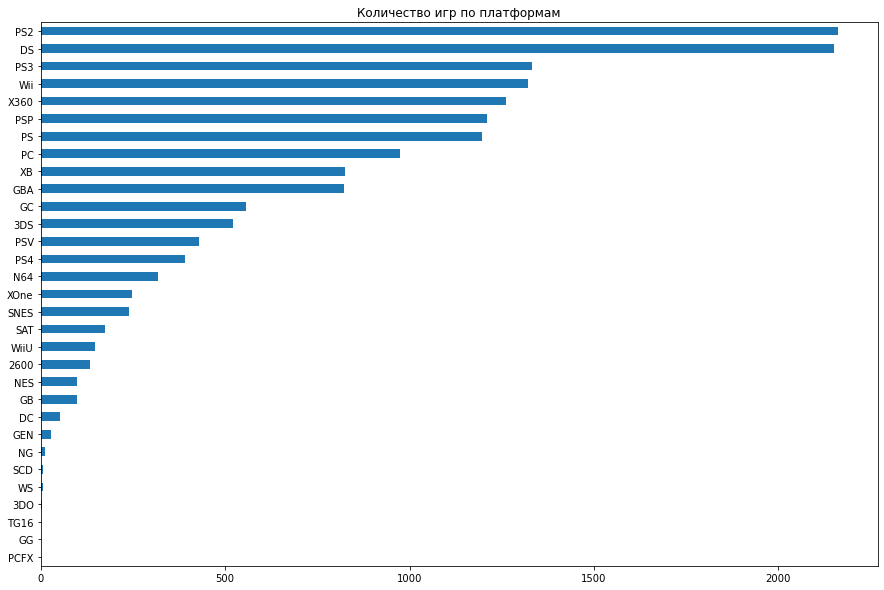

In [423]:
# Количество игр по платформам
games["platform"].value_counts().sort_values().plot(kind="barh", figsize=(15, 10), title="Количество игр по платформам")

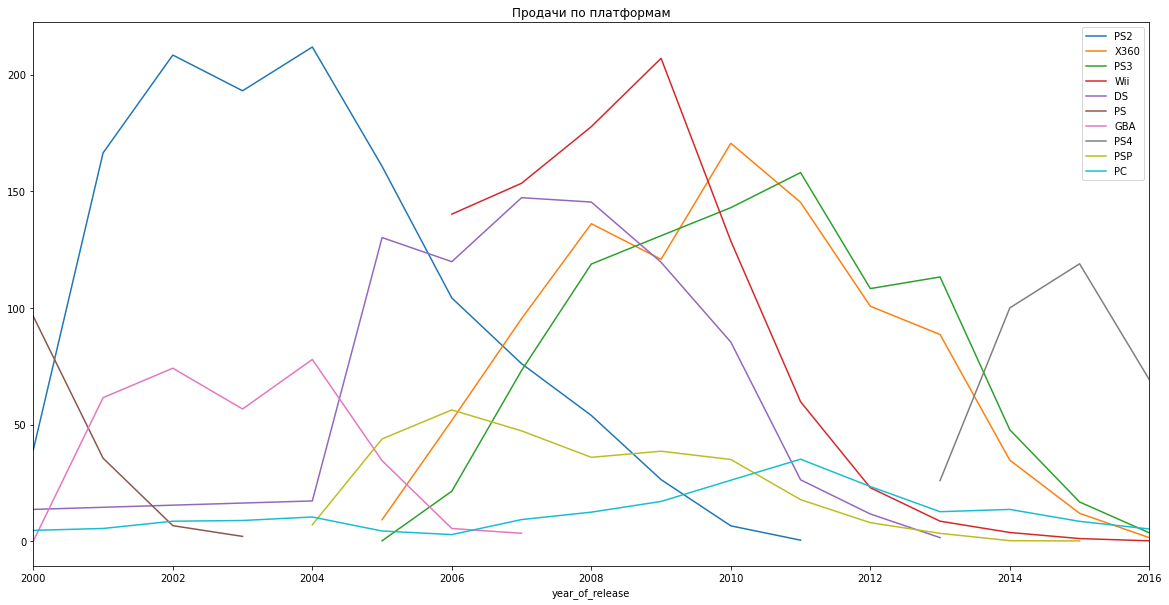

In [424]:
# Метод для визуализации продаж
def TopSalesPlot(data, xlim = [2000, 2016]) :
    
    platforms = data.pivot_table(index="platform", values="sales_total", aggfunc="sum").sort_values(by="sales_total", ascending=False).head(10)

    fig, ax = plt.subplots(figsize =(20,10))

    for platform in platforms.index:
        data.query("platform == @platform").pivot_table(index="year_of_release", values=["sales_total"], aggfunc=["sum"]).plot(ax=ax, title="Продачи по платформам")

    ax.legend(platforms.index)
    ax.set_xlim(xlim)
    plt.show()  

TopSalesPlot(games)

### Вывод 
В среднем платформы живут 9~10 лет. Примерно через пять лет наступает пик, потом продажи начинают падать.

### Актуальный период

Самым актуальным периодом как видно на графике является период с 2005 по 2016г.


In [425]:
# Отсеиваем данные до 2005 года
actual_games  = games.query("year_of_release >= 2005")

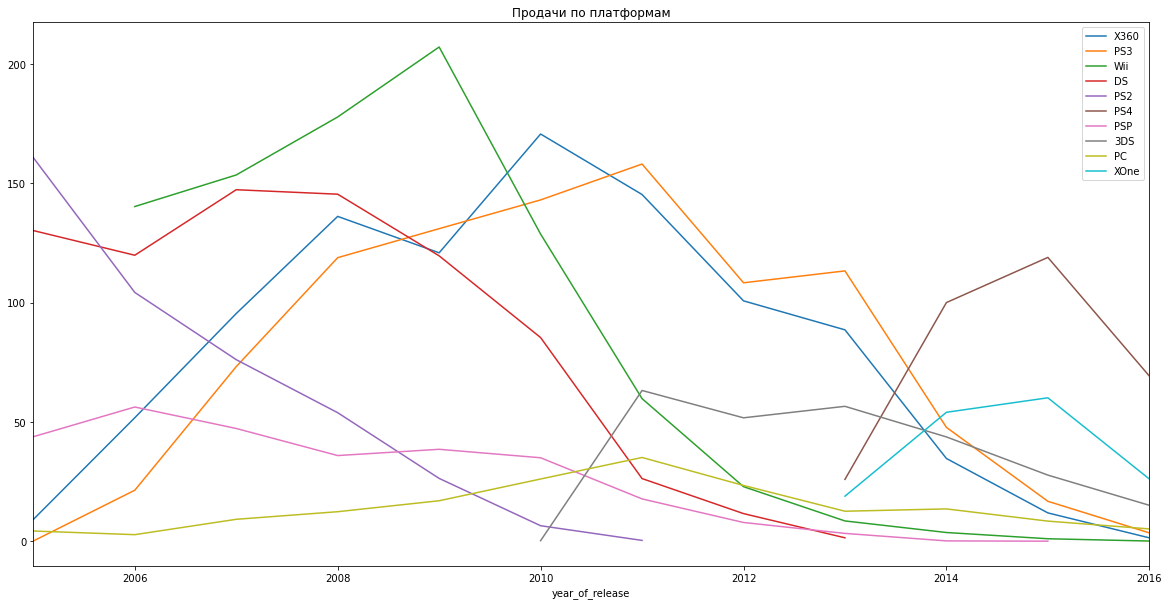

In [426]:
# Спроим график с новыми данными
TopSalesPlot(actual_games , [2005, 2016])

На конец 2016 года лидируют по продажам следующие платформы:

* PS4;
* Xone;
* 3DS.

### Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.0)

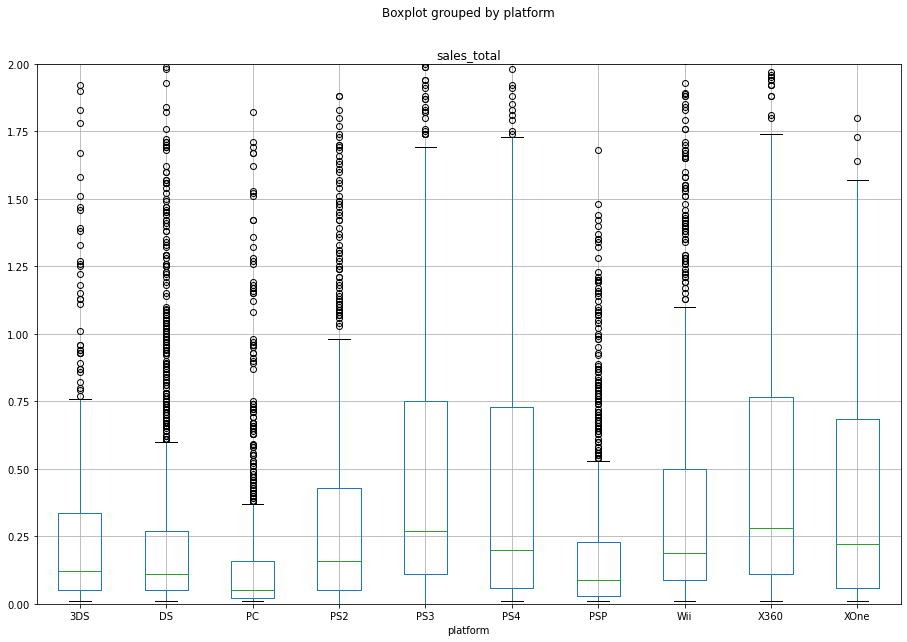

In [439]:
# Строим график «ящик с усами»
group_table = actual_games.pivot_table(index="platform", values=["sales_total"], aggfunc=["count", "sum", "mean", "median"])
group_table.columns = ["count", "sum", "mean", "median"]
group_table = group_table.sort_values(by="sum", ascending=False).head(10)

ax = actual_games.loc[actual_games["platform"].isin(group_table.index)].boxplot(by="platform", column=["sales_total"], figsize=(15, 10))
ax.set_ylim([0, 2])

In [440]:
# Таблица значений
group_table

,count,sum,mean,median
platform,,,,
X360,1250,966.61,0.773288,0.28
PS3,1320,935.19,0.708477,0.27
Wii,1301,903.31,0.694320,0.19
DS,2105,786.99,0.373867,0.11
PS2,1071,428.34,0.399944,0.16
PS4,392,314.14,0.801378,0.20
PSP,1188,286.51,0.241170,0.09
3DS,515,258.53,0.502000,0.12
PC,825,170.84,0.207079,0.05


#### Вывод
На графике видно, что медиана X360 от PS3 почти не отличаются, а меданиа PS4 то же не сильно отчиается от медианы XOne это логично т.к. они конкуренты. Самый низкий показатель у PC это можно обяснить тем, что почти все игры можно скачать бесплатно через торент 

### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков.

#### Влияние оценок критиков

0.3917421352905376

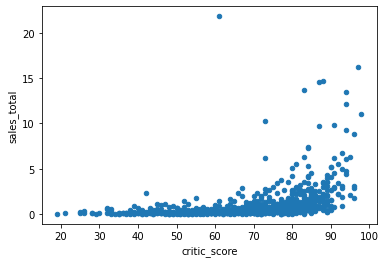

In [493]:
# Выберем X360
games_X360 = actual_games.query("platform == 'X360' and critic_score > 0")
games_X360.plot(y="sales_total", x="critic_score", kind="scatter")
games_X360["critic_score"].corr(games_X360["sales_total"])

Да. Оценка критиков сильно влияет, коэфф. корреляции 0,39

#### Влияние оценок пользователей

0.11365027165034973

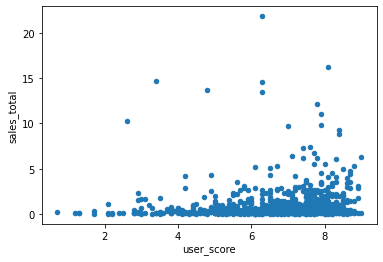

In [492]:
games_X360 = actual_games.query("platform == 'X360' and user_score > 0")
games_X360.plot(y="sales_total", x="user_score", kind="scatter")
games_X360["user_score"].corr(games_X360["sales_total"])

Оценка позователей влияет, но так сильно как оценка критиков, коэфф. корреляции 0,11

In [478]:
# Выбираем топ 10
top_10 = group_table.index.to_list()

In [500]:
# Воводим коэфф. корр. для других платформ
for pl in top_10:
    games_cr = actual_games.query("platform == @pl and critic_score > 0")
    corr_cr = round(games_cr["critic_score"].corr(games_cr["sales_total"]),3)
    
    games_us = actual_games.query("platform == @pl and user_score > 0")
    corr_us = round(games_us["user_score"].corr(games_us["sales_total"]),3)
    
    print('-----------------------------------------------------')
    print(f'{pl} - critic_score: {corr_cr}; user_score: {corr_us}')    

-----------------------------------------------------
X360 - critic_score: 0.392; user_score: 0.114
-----------------------------------------------------
PS3 - critic_score: 0.432; user_score: 0.128
-----------------------------------------------------
Wii - critic_score: 0.178; user_score: 0.113
-----------------------------------------------------
DS - critic_score: 0.238; user_score: 0.135
-----------------------------------------------------
PS2 - critic_score: 0.422; user_score: 0.188
-----------------------------------------------------
PS4 - critic_score: 0.407; user_score: -0.032
-----------------------------------------------------
PSP - critic_score: 0.312; user_score: 0.213
-----------------------------------------------------
3DS - critic_score: 0.348; user_score: 0.222
-----------------------------------------------------
PC - critic_score: 0.276; user_score: -0.031
-----------------------------------------------------
XOne - critic_score: 0.417; user_score: -0.069


На других платформах то же оценка критиков сильнее влияет. PS4 и XOne отличаются от других отрицательной корр. по оценкам пользователей. Наверное это связано с тем, что платформы довольно новые (на 2016 год), вполне вероятно, что пользователи пока не "освоились", поэтому большого количества отзывов, особенно качественных от них нет.

### Распределение игр по жанрам

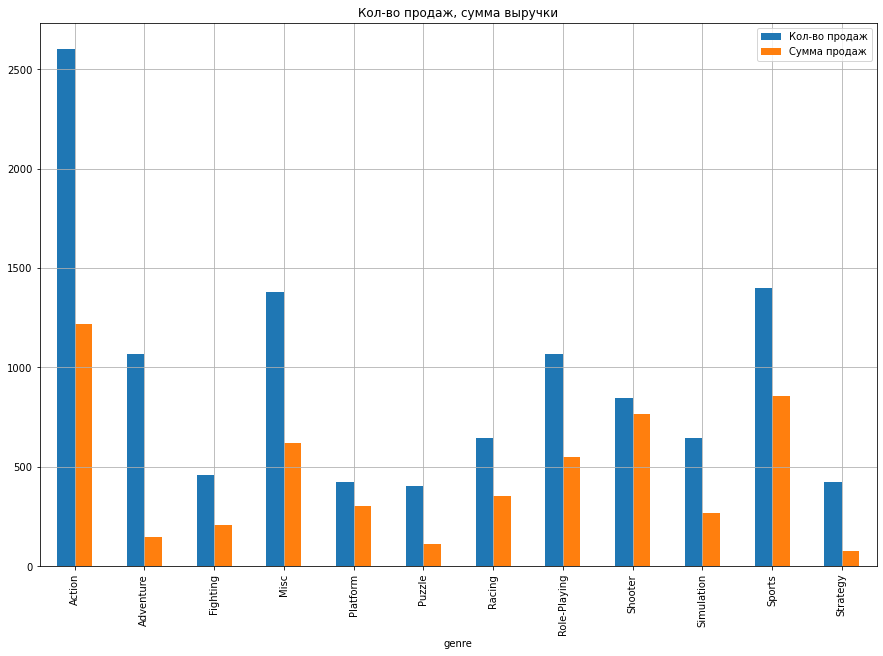

In [526]:
group_genre = actual_games.pivot_table(index="genre", values=["sales_total"], aggfunc=["count", "sum"])

group_genre.columns = ["count", "sum"]

ax = group_genre.plot(kind="bar", figsize=(15, 10), grid=True, title="Кол-во продаж, сумма выручки")
ax.legend(["Кол-во продаж", "Сумма продаж"])

#### Вывод

Опишем отдельно топ по количеству продаж и топ по сумме выручки.

Количество проданных копий:

* Action
* Sports
* Misc

Сумма выручки:

* Action
* Sports
* Shooter